# MARS

Mobile App Research Survey

# Imports and Load Data

## Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import re
import numpy as np
#from itertools import compress
import chart_studio
chart_studio.tools.set_credentials_file(username='jmaton2019', api_key='caM46K9dWQDVD0QPTIYP')
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

## Load Data

In [3]:
data_file = "finalExam_preparation_data.xlsx"
data = pd.read_excel(data_file)
data

,caseID,q1,q2r1,q2r2,q2r3,q2r4,q2r5,q2r6,q2r7,q2r8,...,q49,q50r1,q50r2,q50r3,q50r4,q50r5,q54,q55,q56,q57
0,355,5,0,1,1,0,0,0,0,0,...,1,0,0,0,1,0,1,2,11,1
1,1397,3,0,0,1,0,0,0,0,0,...,2,1,0,0,0,0,2,2,9,2
2,1197,2,0,1,1,0,0,0,0,0,...,2,1,0,0,0,0,1,2,8,2
3,484,2,0,0,0,0,1,0,0,0,...,2,1,0,0,0,0,2,2,1,1
4,2113,4,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,1,2,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,676,7,0,0,0,1,0,0,0,0,...,1,0,0,0,1,1,1,2,5,2
96,829,3,1,1,0,0,0,0,0,0,...,1,1,0,0,0,0,1,2,6,2
97,1887,3,1,0,0,0,0,0,1,0,...,1,1,0,0,0,0,1,2,5,1
98,313,2,0,1,1,0,0,0,0,0,...,2,1,0,0,0,0,1,2,10,1


# Survey Questions

The following function is a general function used for many of the plots

In [4]:
def plotCounts (data, Q_df, c, labels):
    # creates the count plots
    # data is the dataframe holding the survey data
    # Q_df is the header info dataframe
    # c is the index in the Q_df dataframe
    # labels is the list of value labels used
    
    # ensure only the used labels remain
    ind = list(data[Q_df['CellCode'][c]].value_counts().index -1)
    ind.sort()
    labels = [labels[i] for i in ind]
    
    # now plot
    fig, ax = plt.subplots(figsize = (15, 6))
    fig.canvas.draw()
    sns.countplot(x = Q_df['CellCode'][c],
                  data = data);
    ax.set_xticklabels(labels,
                  rotation = 90)
    plt.title('Frequency of visit - ' + Q_df['Short'][c])
    plt.xlabel(Q_df['Statement'][c])
    plt.savefig('Frequency of visit - ' + Q_df['Short'][c] + '.png')
    plt.show()

## Q1 - Age

Which of the following best describes your age?

| Answer | Value |
|---|---|
| Under 18   | 1 | 
| 18-24      | 2 |
| 25-29      | 3 |
| 30-34      | 4 |
| 35-39      | 5 |
| 40-44      | 6 |
| 45-49      | 7 |
| 50-54      | 8 |
| 55-59      | 9 |
| 60-64      | 10 |
| 65 or over | 12 |

**The last category (65 or over) is likely to be of value 11 insted of 12**

non-behavioral

In [5]:
data.rename(columns = {'q1': 'q1_Age'},
            inplace = True)
labels_q1 = ['<18',
             '18-24',
             '25-29',
             '30-34',
             '35-39',
             '40-44',
             '45-49',
             '50-54',
             '55-59',
             '60-64',
             '>65']
# ensure only the used labels remain
ind = list(data['q1_Age'].value_counts().index -1)
ind.sort()
labels_q1 = [labels_q1[i] for i in ind]

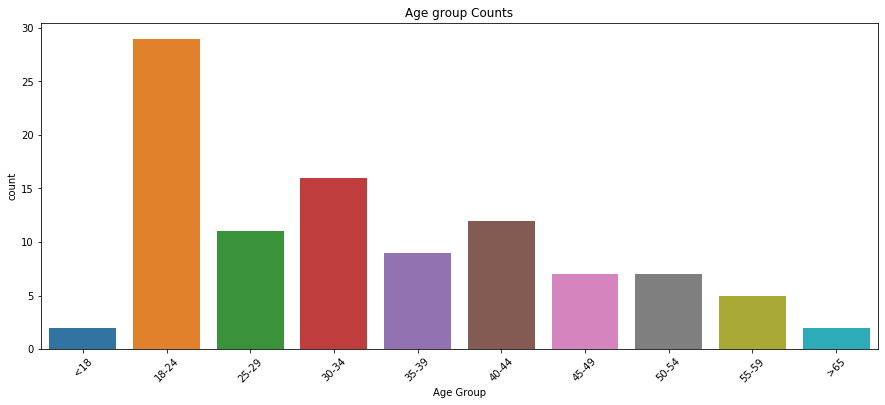

In [6]:
fig, ax = plt.subplots(figsize = (15, 6))
sns.countplot(x = 'q1_Age',
              data = data);
ax.set_xticklabels(labels_q1,
                   rotation = 45)
plt.title('Age group Counts')
plt.xlabel("Age Group")
plt.savefig('Age group Counts.png')
plt.show()

**Take the age distribution into account**

## Q2 - Device Ownership

Do you own any of the following smartphones or other web-enabled devices?

The answers are encoded as follows:

| Answer Column | Device |
|---|---|
| q2r1 | iPhone |
| q2r2 | iPod touch |
| q2r3 | Android |
| q2r4 | BlackBerry |
| q2r5 | Nokia |
| q2r6 | Windows Phone or Windows Mobile |
| q2r7 | HP/ Palm WebOS |
| q2r8 | Tablet (iPad, Xoom, Galaxy Tab etc.) |
| q2r9 | Other smartphone (please specify) |
| q2r10 | None |

For other there is no free text encoded.

In [7]:
data.rename(columns = {'q2r1' : 'q2r1_Device_iPhone',
                       'q2r2' : 'q2r2_Device_iPod',
                       'q2r3' : 'q2r3_Device_Android',
                       'q2r4' : 'q2r4_Device_BlackBerry',
                       'q2r5' : 'q2r5_Device_Nokia',
                       'q2r6' : 'q2r6_Device_Windows',
                       'q2r7' : 'q2r7_Device_HP',
                       'q2r8' : 'q2r8_Device_Tablet',
                       'q2r9' : 'q2r9_Device_OtherSmartphone',
                       'q2r10': 'q2r10_Device_None'},
            inplace = True)

In [8]:
Q2_counts = {'iPhone'                          : sum(data['q2r1_Device_iPhone']),
             'iPod touch'                      : sum(data['q2r2_Device_iPod']),
             'Android'                         : sum(data['q2r3_Device_Android']),
             'BlackBerry'                      : sum(data['q2r4_Device_BlackBerry']),
             'Nokia'                           : sum(data['q2r5_Device_Nokia']),
             'Windows Phone or Windows Mobile' : sum(data['q2r6_Device_Windows']),
             'HP Palm WebOS'                   : sum(data['q2r7_Device_HP']),
             'Tablet'                          : sum(data['q2r8_Device_Tablet']),
             'Other smartphone'                : sum(data['q2r9_Device_OtherSmartphone']),
             'None'                            : sum(data['q2r10_Device_None'])}

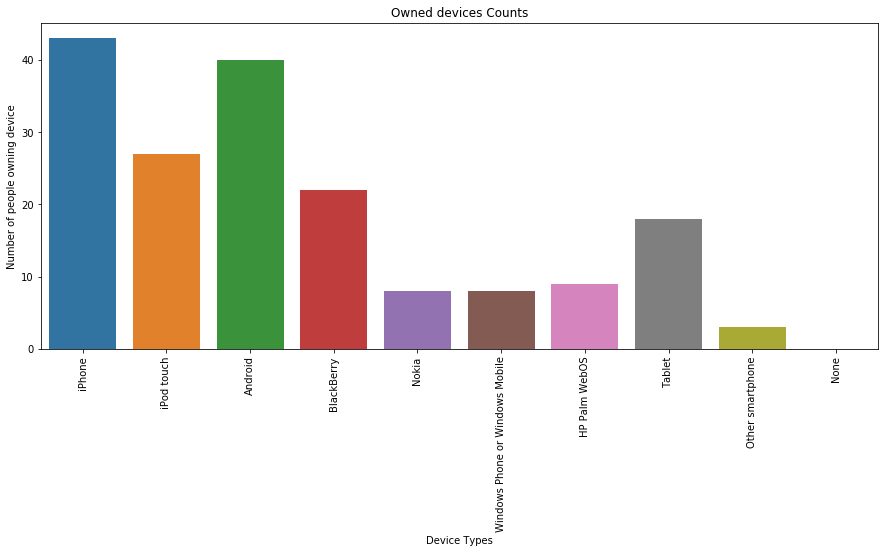

In [9]:
fig, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = list(Q2_counts.keys()),
            y = list(Q2_counts.values()));
ax.set_xticklabels(ax.get_xticklabels(),
                   rotation = 90)
plt.xlabel("Device Types")
plt.title('Owned devices Counts')
plt.ylabel('Number of people owning device')
plt.savefig('Owned devices Counts.png')
plt.show()

## Q4 - App Usage

Do you use any of the following kinds of Apps?
(Select all that apply)

| Answer Column | App Type |
|---|---|
| q4r1  | Music and Sound Identification Apps |
| q4r2  | TV Check-in Apps |
| q4r3  | Entertainment Apps (i.e. U2) |
| q4r4  | TV Show Apps (i.e. Glee) |
| q4r5  | Gaming Apps |
| q4r6  | Social Networking Apps (i.e. Facebook) |
| q4r7  | General News Apps (i.e. Yahoo! News) |
| q4r8  | Shopping Apps |
| q4r9  | Specific Publication News Apps (i.e. New York Times) |
| q4r10 | Other |
| q4r11 | None |



In [ ]:
data.rename(columns = {'q4r1' : 'q4r1_App_Music',
                       'q4r2' : 'q4r2_App_TVCheck',
                       'q4r3' : 'q4r3_App_Entertainment',
                       'q4r4' : 'q4r4_App_TVShow',
                       'q4r5' : 'q4r5_App_Gaming',
                       'q4r6' : 'q4r6_App_SocialNetworking',
                       'q4r7' : 'q4r7_App_News',
                       'q4r8' : 'q4r8_App_Shopping',
                       'q4r9' : 'q4r9_App_SpecificNews',
                       'q4r10': 'q4r10_App_Other',
                       'q4r11': 'q4r11_App_None'},
            inplace = True)

In [ ]:
Q4_counts = {'Music and Sound Identification' : sum(data['q4r1_App_Music']),
             'TV Check-in'                    : sum(data['q4r2_App_TVCheck']),
             'Entertainment'                  : sum(data['q4r3_App_Entertainment']),
             'TV Show'                        : sum(data['q4r4_App_TVShow']),
             'Gaming'                         : sum(data['q4r5_App_Gaming']),
             'Social Networking'              : sum(data['q4r6_App_SocialNetworking']),
             'General News'                   : sum(data['q4r7_App_News']),
             'Shopping'                       : sum(data['q4r8_App_Shopping']),
             'Specific Publication News'      : sum(data['q4r9_App_SpecificNews']),
             'Other'                          : sum(data['q4r10_App_Other']),
             'None'                           : sum(data['q4r11_App_None'])}

In [ ]:
fig, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = list(Q4_counts.keys()),
            y = list(Q4_counts.values()));
ax.set_xticklabels(ax.get_xticklabels(),
                   rotation = 90)
plt.xlabel("App types")
plt.title('App use by types Counts')
plt.ylabel('Number of people using App')
plt.savefig('App use by types Counts.png')
plt.show()

## Q11 - Number of Apps

How many Apps do you have on your smartphone/iPod Touch/Tablet? If you have more than of these device, please tell us the total number of Apps.

| Answer | Value |
|---|---|
| 1-5   | 1 | 
| 6-10      | 2 |
| 11-30      | 3 |
| 31+      | 4 |
| Don't know      | 4 |
| None      | 6 |

**Most likely the don't knw should be encoded as 5**

In [ ]:
data.rename(columns = {'q11' : 'q11_NumApps'},
            inplace = True)

In [ ]:
labels_q11 = ['1-5',
              '6-10',
              '11-30',
              '31+',
              "Don't know",
              'None']
# ensure only the used labels remain
ind = list(data['q11_NumApps'].value_counts().index -1)
ind.sort()
labels_q11 = [labels_q11[i] for i in ind]

In [ ]:
fig, ax = plt.subplots(figsize = (15, 6))
sns.countplot(x = 'q11_NumApps',
              data = data);
ax.set_xticklabels(labels_q11,
                   rotation = 45)
plt.title('Number of Apps on devices Count')
plt.xlabel("Number of Apps on devices")
plt.savefig('Number of Apps Counts.png')
plt.show()

## Q12 - Free Apps %

Of your Apps, what percent were free to download?

| Answer | Value |
|---|---|
| None of my Apps were free   | 1 | 
| 1%-25%      | 2 |
| 26% - 50%      | 3 |
| 51% - 75%      | 4 |
| 76% - 99%      | 5 |
| All of my Apps were free      | 6 |

In [ ]:
data.rename(columns = {'q12' : 'q12_PctFreeApps'},
            inplace = True)

In [ ]:
labels_q12 = ['0',
              '1-25',
              '26 - 50',
              '51 - 75',
              "76 - 99",
              '100']
# ensure only the used labels remain
ind = list(data['q12_PctFreeApps'].value_counts().index -1)
ind.sort()
labels_q12 = [labels_q12[i] for i in ind]

In [ ]:
fig, ax = plt.subplots(figsize = (15, 6))
sns.countplot(x = 'q12_PctFreeApps',
              data = data);
ax.set_xticklabels(labels_q12,
                   rotation = 90)
plt.title('Count')
plt.xlabel("Percentage of free Apps")
plt.savefig('Percentage of free apps.png')
plt.show()

## Q13 - Number Website Visits

How many times per week do you visit each of the following websites?


| Answer Column | Website |
|---|---|
| q13r1  | Facebook |
| q13r2  | Twitter |
| q13r3  | Myspace |
| q13r4  | Pandora Radio |
| q13r5  | Vevo |
| q13r6  | YouTube |
| q13r7  | AOL Radio |
| q13r8  | Last.fm |
| q13r9  | Yahoo Entertainment and Music |
| q13r10 | IMDB |
| q13r11 | LinkedIn |
| q13r12 | Netflix |

| Answer Code | Meaning |
|---|---|
| 1 | very often|
| 2 | sometimes|
| 3 | rarely|
| 4 | almost never|

**The answer codes don't make sense for this question - how many times can not be answered with rarely**

In [ ]:
labels_q13 = ['very often',
              'sometimes',
              'rarely',
              'almost never']

In [ ]:
# All the heading information in a easy to use format
Q13 = pd.DataFrame({'Statement' : ['Facebook',
                                   'Twitter',
                                   'Myspace',
                                   'Pandora Radio',
                                   'Vevo',
                                   'YouTube',
                                   'AOL Radio',
                                   'Last.fm',
                                   'Yahoo Entertainment and Music',
                                   'IMDB',
                                   'LinkedIn',
                                   'Netflix'],
                   'Short' : ['Facebook',
                              'Twitter',
                              'Myspace',
                              'Pandora Radio',
                              'Vevo',
                              'YouTube',
                              'AOL Radio',
                              'Last.fm',
                              'Yahoo Entertainment and Music',
                              'IMDB',
                              'LinkedIn',
                              'Netflix'],
                   'CellCode' : ['q13r1_SiteVisits_Facebook',
                                 'q13r2_SiteVisits_Twitter',
                                 'q13r3_SiteVisits_Myspace',
                                 'q13r4_SiteVisits_Pandora',
                                 'q13r5_SiteVisits_Vevo',
                                 'q13r6_SiteVisits_YouTube',
                                 'q13r7_SiteVisits_AOL',
                                 'q13r8_SiteVisits_Last',
                                 'q13r9_SiteVisits_Yahoo',
                                 'q13r10_SiteVisits_IMDB',
                                 'q13r11_SiteVisits_LinkedIn',
                                 'q13r12_SiteVisits_Netflix']},
                  index = ['r1',
                           'r2',
                           'r3',
                           'r4',
                           'r5',
                           'r6',
                           'r7',
                           'r8',
                           'r9',
                           'r10',
                           'r11',
                           'r12'])

### R1 - Facebook

In [ ]:
data.rename(columns = {'q13r1' : 'q13r1_SiteVisits_Facebook'},
            inplace = True)

In [ ]:
plotCounts(data, Q13, 'r1', labels_q13)

### R2 - Twitter

In [ ]:
data.rename(columns = {'q13r2' : 'q13r2_SiteVisits_Twitter'},
            inplace = True)

In [ ]:
plotCounts(data, Q13, 'r2', labels_q13)

### R3 - Myspace

In [ ]:
data.rename(columns = {'q13r3' : 'q13r3_SiteVisits_Myspace'},
            inplace = True)

In [ ]:
plotCounts(data, Q13, 'r3', labels_q13)

### R4 - Pandora Radio

In [ ]:
data.rename(columns = {'q13r4' : 'q13r4_SiteVisits_Pandora'},
            inplace = True)

In [ ]:
plotCounts(data, Q13, 'r4', labels_q13)

### R5 - Vevo

In [ ]:
data.rename(columns = {'q13r5' : 'q13r5_SiteVisits_Vevo'},
            inplace = True)

In [ ]:
plotCounts(data, Q13, 'r5', labels_q13)

### R6 - YouTube

In [ ]:
data.rename(columns = {'q13r6' : 'q13r6_SiteVisits_YouTube'},
            inplace = True)

In [ ]:
plotCounts(data, Q13, 'r6', labels_q13)

### R7 - AOL Radio

In [ ]:
data.rename(columns = {'q13r7' : 'q13r7_SiteVisits_AOL'},
            inplace = True)

In [ ]:
plotCounts(data, Q13, 'r7', labels_q13)

### R8 - Last.fm

In [ ]:
data.rename(columns = {'q13r8' : 'q13r8_SiteVisits_Last'},
            inplace = True)

In [ ]:
plotCounts(data, Q13, 'r8', labels_q13)

### R9 - Yahoo Entertainment and Music

In [ ]:
data.rename(columns = {'q13r9' : 'q13r9_SiteVisits_Yahoo'},
            inplace = True)

In [ ]:
plotCounts(data, Q13, 'r9', labels_q13)

### R10 - IMDB

In [ ]:
data.rename(columns = {'q13r10' : 'q13r10_SiteVisits_IMDB'},
            inplace = True)

In [ ]:
plotCounts(data, Q13, 'r10', labels_q13)

### R11 - LinkedIn

In [ ]:
data.rename(columns = {'q13r11' : 'q13r11_SiteVisits_LinkedIn'},
            inplace = True)

In [ ]:
plotCounts(data, Q13, 'r11', labels_q13)

### R12 - Netflix

In [ ]:
data.rename(columns = {'q13r12' : 'q13r12_SiteVisits_Netflix'},
            inplace = True)

In [ ]:
plotCounts(data, Q13, 'r12', labels_q13)

## Q24 - Statements

Please tell us how much you agree or disagree with each of the following statements.

| Answer Column | Statement |
|---|---|
| q24r1  | I try to keep up with technological developments |
| q24r2  | People often ask my advice when they are looking to buy technology or electronic products |
| q24r3  | I enjoy purchasing new gadgets and appliances |
| q24r4  | I think there is too much technology in everyday life |
| q24r5  | I enjoy using technology to give me more control over my life |
| q24r6  | I look for web tools and Apps that help me save time |
| q24r7  | Music is an important part of my life |
| q24r8  | I like learning more about my favorite TV shows when I’m not watching them |
| q24r9  | I think there is too much information out there today from the internet and sites like Facebook |
| q24r10 | I’m always checking on friends and family through Facebook or other networking websites |
| q24r11 | The internet makes it easier to keep in touch with family and friends |
| q24r12 | The internet makes it easy to avoid seeing or having to speak with family and friends |

| Answer Code | Meaning |
|---|---|
| 1 | Agree Strongly|
| 2 | Agree|
| 3 | Agree Somewhat|
| 4 | Disagree Somewhat|
| 5 | Disagree |
| 6 | Disagree Strongly |



In [ ]:
labels_q24 = ['Agree Strongly',
              'Agree',
              'Agree Somewhat',
              'Disagree Somewhat',
              'Disagree',
              'Disagree Strongly']

In [ ]:
Q24 = pd.DataFrame({'Statement' : ['I try to keep up with technological developments',
                                   'People often ask my advice when they are looking to buy technology or electronic products',
                                   'I enjoy purchasing new gadgets and appliances',
                                   'I think there is too much technology in everyday life',
                                   'I enjoy using technology to give me more control over my life',
                                   'I look for web tools and Apps that help me save time',
                                   'Music is an important part of my life',
                                   'I like learning more about my favorite TV shows when I’m not watching them',
                                   'I think there is too much information out there today from the internet and sites like Facebook',
                                   'I’m always checking on friends and family through Facebook or other networking websites',
                                   'The internet makes it easier to keep in touch with family and friends',
                                   'The internet makes it easy to avoid seeing or having to speak with family and friends'],
                   'Short' : ['technological developments',
                              'purchase advice',
                              'purchase gadgets',
                              'too much technology',
                              'control through technology',
                              'time saving',
                              'Importance of music',
                              'learning about TV shows',
                              'too much information',
                              'checking on friends',
                              'easy to keep in touch',
                              'easy to avoid seeing friends'],
                   'CellCode' : ['q24r1_StatM_techDev',
                                 'q24r2_StatM_purchAdv',
                                 'q24r3_StatM_purchGadg',
                                 'q24r4_StatM_tooMuchTech',
                                 'q24r5_StatM_controlTech',
                                 'q24r6_StatM_timeSaving',
                                 'q24r7_StatM_MusicImport',
                                 'q24r8_StatM_TVShowsLearning',
                                 'q24r9_StatM_tooMuchInfo',
                                 'q24r10_StatM_checkFriends',
                                 'q24r11_StatM_keepInTouch',
                                 'q24r12_StatM_avoidFriends']},
                  index = ['r1',
                           'r2',
                           'r3',
                           'r4',
                           'r5',
                           'r6',
                           'r7',
                           'r8',
                           'r9',
                           'r10',
                           'r11',
                           'r12'])

In [ ]:
data.rename(columns = {'q24r1' : 'q24r1_StatM_techDev',
                       'q24r2' : 'q24r2_StatM_purchAdv',
                       'q24r3' : 'q24r3_StatM_purchGadg',
                       'q24r4' : 'q24r4_StatM_tooMuchTech',
                       'q24r5' : 'q24r5_StatM_controlTech',
                       'q24r6' : 'q24r6_StatM_timeSaving',
                       'q24r7' : 'q24r7_StatM_MusicImport',
                       'q24r8' : 'q24r8_StatM_TVShowsLearning',
                       'q24r9' : 'q24r9_StatM_tooMuchInfo',
                       'q24r10': 'q24r10_StatM_checkFriends',
                       'q24r11': 'q24r11_StatM_keepInTouch',
                       'q24r12': 'q24r12_StatM_avoidFriends'},
            inplace = True)

### R1 - technological developments

I try to keep up with technological developments {{Q24}}

In [ ]:
plotCounts(data, Q24, 'r1', labels_q24)

### R2 - purchase advice

People often ask my advice when they are looking to buy technology or electronic products

In [ ]:
plotCounts(data, Q24, 'r2', labels_q24)

### R3 - purchase gadgets
I enjoy purchasing new gadgets and appliances

In [ ]:
plotCounts(data, Q24, 'r3', labels_q24)

### R4 - too much technology

I think there is too much technology in everyday life

In [ ]:
plotCounts(data, Q24, 'r4', labels_q24)

### R5 - control through technology

I enjoy using technology to give me more control over my life

In [ ]:
plotCounts(data, Q24, 'r5', labels_q24)

### R6 - time saving

I look for web tools and Apps that help me save time

In [ ]:
plotCounts(data, Q24, 'r6', labels_q24)

### R7 - Importance of music

Music is an important part of my life

In [ ]:
plotCounts(data, Q24, 'r7', labels_q24)

### R8 - learning about TV shows

I like learning more about my favorite TV shows when I’m not watching them

In [ ]:
plotCounts(data, Q24, 'r8', labels_q24)

### R9 - too much information

I think there is too much information out there today from the internet and sites like Facebook

In [ ]:
plotCounts(data, Q24, 'r9', labels_q24)

### R10 - checking in friends

I’m always checking on friends and family through Facebook or other networking websites

In [ ]:
plotCounts(data, Q24, 'r10', labels_q24)

### R11 - easy to keep in touch

The internet makes it easier to keep in touch with family and friends

In [ ]:
plotCounts(data, Q24, 'r11', labels_q24)

### R12 - easy to avoid seeing friends

The internet makes it easy to avoid seeing or having to speak with family and friends

In [ ]:
plotCounts(data, Q24, 'r12', labels_q24)

## Q25 - Personal Statements

And how much do you agree or disagree with each of the following?

| Answer Column | Statement |
|---|---|
| q25r1  | I consider myself an opinion leader |
| q25r2  | I like to stand out from others |
| q25r3  | I like to offer advice to others |
| q25r4  | I like to take the lead in decision making |
| q25r5  | I’m the first of my friends and family to try new things |
| q25r6  | Responsibility is overrated; I’d rather be told what to do |
| q25r7  | I like being in control |
| q25r8  | I’m a risk taker |
| q25r9  | I think of myself as creative |
| q25r10 | I am an optimistic person |
| q25r11 | I am very active and always on the go |
| q25r12 | I always feel stretched for time |

| Answer Code | Meaning |
|---|---|
| 1 | Agree Strongly|
| 2 | Agree|
| 3 | Agree Somewhat|
| 4 | Disagree Somewhat|
| 5 | Disagree |
| 6 | Disagree Strongly |

In [ ]:
labels_q25 = ['Agree Strongly',
              'Agree',
              'Agree Somewhat',
              'Disagree Somewhat',
              'Disagree',
              'Disagree Strongly']

In [ ]:
Q25 = pd.DataFrame({'Statement' : ['I consider myself an opinion leader',
                                   'I like to stand out from others',
                                   'I like to offer advice to others',
                                   'I like to take the lead in decision making',
                                   'I’m the first of my friends and family to try new things',
                                   'Responsibility is overrated; I’d rather be told what to do',
                                   'I like being in control',
                                   'I’m a risk taker',
                                   'I think of myself as creative',
                                   'I am an optimistic person',
                                   'I am very active and always on the go',
                                   'I always feel stretched for time'],
                   'Short' : ['opinion leader',
                              'stand out',
                              'offer advice',
                              'take the lead',
                              'try new things',
                              'Responsibility overrated',
                              'be in control',
                              'risk taker',
                              'creative',
                              'optimistic',
                              'very active',
                              'stretched for time'],
                   'CellCode' : ['q25r1_PS_opinionLeader',
                                 'q25r2_PS_standOut',
                                 'q25r3_PS_offerAdvice',
                                 'q25r4_PS_takeLead',
                                 'q25r5_PS_tryNew',
                                 'q25r6_PS_noResponsibility',
                                 'q25r7_PS_control',
                                 'q25r8_PS_takeRisk',
                                 'q25r9_PS_creative',
                                 'q25r10_PS_optimistic',
                                 'q25r11_PS_active',
                                 'q25r12_PS_noTime']},
                  index = ['r1',
                           'r2',
                           'r3',
                           'r4',
                           'r5',
                           'r6',
                           'r7',
                           'r8',
                           'r9',
                           'r10',
                           'r11',
                           'r12'])

In [ ]:
data.rename(columns = {'q25r1' : 'q25r1_PS_opinionLeader',
                       'q25r2' : 'q25r2_PS_standOut',
                       'q25r3' : 'q25r3_PS_offerAdvice',
                       'q25r4' : 'q25r4_PS_takeLead',
                       'q25r5' : 'q25r5_PS_tryNew',
                       'q25r6' : 'q25r6_PS_noResponsibility',
                       'q25r7' : 'q25r7_PS_control',
                       'q25r8' : 'q25r8_PS_takeRisk',
                       'q25r9' : 'q25r9_PS_creative',
                       'q25r10': 'q25r10_PS_optimistic',
                       'q25r11': 'q25r11_PS_active',
                       'q25r12': 'q25r12_PS_noTime'},
            inplace = True)

### R1 - opinion leader

I consider myself an opinion leader

In [ ]:
plotCounts(data, Q25, 'r1', labels_q25)

### R2 - stand out

I like to stand out from others

In [ ]:
plotCounts(data, Q25, 'r2', labels_q25)

### R3 - offer advice

I like to offer advice to others

In [ ]:
plotCounts(data, Q25, 'r3', labels_q25)

### R4 - take the lead

I like to take the lead in decision making

In [ ]:
plotCounts(data, Q25, 'r4', labels_q25)

### R5 - try new things

I’m the first of my friends and family to try new things

In [ ]:
plotCounts(data, Q25, 'r5', labels_q25)

### R6 - Responsibility overrated

Responsibility is overrated; I’d rather be told what to do

In [ ]:
plotCounts(data, Q25, 'r6', labels_q25)

### R7 - be in control

I like being in control

In [ ]:
plotCounts(data, Q25, 'r7', labels_q25)

### R8 - risk taker

I’m a risk taker

In [ ]:
plotCounts(data, Q25, 'r8', labels_q25)

### R9 - creative

I think of myself as creative

In [ ]:
plotCounts(data, Q25, 'r9', labels_q25)

### R10 - optimistic

I am an optimistic person

In [ ]:
plotCounts(data, Q25, 'r10', labels_q25)

### R11 - very active

I am very active and always on the go

In [ ]:
plotCounts(data, Q25, 'r11', labels_q25)

### R12 - stretched for time

I always feel stretched for time

In [ ]:
plotCounts(data, Q25, 'r12', labels_q25)

## Q26 - More Statements

How much do you agree or disagree with each of these statements?

| Answer Column | Statement |
|---|---|
| q26r3  | I am always on the lookout for a bargain, discounts or deals |
| q26r4  | I derive enjoyment from any kind of shopping |
| q26r5  | I like package deals because I don’t have to do as much planning |
| q26r6  | I’m always shopping online |
| q26r18 | I find I’m often attracted to luxury brands |
| q26r7  | I prefer to buy designer brands |
| q26r8  | I can’t get enough Apps |
| q26r9  | It’s not the number of Apps you have but how cool they are that really matters |
| q26r10 | I love showing off my new Apps to others |
| q26r11 | My children have an impact on the Apps I download |
| q26r12 | It’s usually worth spending a few extra dollars to get extra App features |
| q26r13 | There’s no point in earning money if I’m not going to spend it |
| q26r14 | I am influenced by what’s hot and what’s not |
| q26r15 | I buy brands that reflect my style |
| q26r16 | I tend to make impulse purchases |
| q26r17 | Above all else, I think of my mobile phone as a source of entertainment |

| Answer Code | Meaning |
|---|---|
| 1 | Agree Strongly|
| 2 | Agree|
| 3 | Agree Somewhat|
| 4 | Disagree Somewhat|
| 5 | Disagree |
| 6 | Disagree Strongly |

In [ ]:
labels_q26 = ['Agree Strongly',
              'Agree',
              'Agree Somewhat',
              'Disagree Somewhat',
              'Disagree',
              'Disagree Strongly']

In [ ]:
Q26 = pd.DataFrame({'Statement' : ['I am always on the lookout for a bargain, discounts or deals',
                                   'I derive enjoyment from any kind of shopping',
                                   'I like package deals because I don’t have to do as much planning',
                                   'I’m always shopping online',
                                   'I find I’m often attracted to luxury brands',
                                   'I prefer to buy designer brands',
                                   'I can’t get enough Apps',
                                   'It’s not the number of Apps you have but how cool they are that really matters',
                                   'I love showing off my new Apps to others',
                                   'My children have an impact on the Apps I download',
                                   'It’s usually worth spending a few extra dollars to get extra App features',
                                   'There’s no point in earning money if I’m not going to spend it',
                                   'I am influenced by what’s hot and what’s not',
                                   'I buy brands that reflect my style',
                                   'I tend to make impulse purchases',
                                   'Above all else, I think of my mobile phone as a source of entertainment'],
                   'Short' : ['bargain',
                              'enjoyment from shopping',
                              'package deals',
                              'shopping online',
                              'attracted to luxury',
                              'designer brands',
                              'many Apps',
                              'cool Apps',
                              'showing off Apps',
                              'children have impact',
                              'spending on Apps',
                              'spending money',
                              'influenced by trends',
                              'brands reflect style',
                              'impulse purchases',
                              'entertainment'],
                   'CellCode' : ['q26r3_StateM_bargain',
                                 'q26r4_StateM_enjoyShop',
                                 'q26r5_StateM_deals',
                                 'q26r6_StateM_onlineShop',
                                 'q26r18_StateM_luxury',
                                 'q26r7_StateM_designer',
                                 'q26r8_StateM_manyApps',
                                 'q26r9_StateM_coolApps',
                                 'q26r10_StateM_showOffApps',
                                 'q26r11_StateM_childImpact',
                                 'q26r12_StateM_spendingApps',
                                 'q26r13_StateM_spendMoney',
                                 'q26r14_StateM_trendInfluence',
                                 'q26r15_StateM_styleBrand',
                                 'q26r16_StateM_impulsePurch',
                                 'q26r17_StateM_entertainment']},
                  index = ['r3',
                           'r4',
                           'r5',
                           'r6',
                           'r18',
                           'r7',
                           'r8',
                           'r9',
                           'r10',
                           'r11',
                           'r12',
                           'r13',
                           'r14',
                           'r15',
                           'r16',
                           'r17'])

In [ ]:
data.rename(columns = {'q26r3' : 'q26r3_StateM_bargain',
                       'q26r4' : 'q26r4_StateM_enjoyShop',
                       'q26r5' : 'q26r5_StateM_deals',
                       'q26r6' : 'q26r6_StateM_onlineShop',
                       'q26r7' : 'q26r7_StateM_designer',
                       'q26r8' : 'q26r8_StateM_manyApps',
                       'q26r9' : 'q26r9_StateM_coolApps',
                       'q26r10': 'q26r10_StateM_showOffApps',
                       'q26r11': 'q26r11_StateM_childImpact',
                       'q26r12': 'q26r12_StateM_spendingApps',
                       'q26r13': 'q26r13_StateM_spendMoney',
                       'q26r14': 'q26r14_StateM_trendInfluence',
                       'q26r15': 'q26r15_StateM_styleBrand',
                       'q26r16': 'q26r16_StateM_impulsePurch',
                       'q26r17': 'q26r17_StateM_entertainment',
                       'q26r18': 'q26r18_StateM_luxury'},
            inplace = True)

### R3 - bargain

I am always on the lookout for a bargain, discounts or deals

In [ ]:
plotCounts(data, Q26, 'r3', labels_q26)

### R4 - enjoyment from shopping

I derive enjoyment from any kind of shopping

In [ ]:
plotCounts(data, Q26, 'r4', labels_q26)

### R5 - package deals

I like package deals because I don’t have to do as much planning

In [ ]:
plotCounts(data, Q26, 'r5', labels_q26)

### R6 - shopping online

I’m always shopping online

In [ ]:
plotCounts(data, Q26, 'r6', labels_q26)

### R7 - designer brands

I prefer to buy designer brands

In [ ]:
plotCounts(data, Q26, 'r7', labels_q26)

### R8 - many Apps

I can’t get enough Apps

In [ ]:
plotCounts(data, Q26, 'r8', labels_q26)

### R9 - cool Apps

It’s not the number of Apps you have but how cool they are that really matters

In [ ]:
plotCounts(data, Q26, 'r9', labels_q26)

### R10 - showing off Apps

I love showing off my new Apps to others

In [ ]:
plotCounts(data, Q26, 'r10', labels_q26)

### R11 - children have impact

My children have an impact on the Apps I download

In [ ]:
plotCounts(data, Q26, 'r11', labels_q26)

### R12 - spending on Apps

It’s usually worth spending a few extra dollars to get extra App features

In [ ]:
plotCounts(data, Q26, 'r12', labels_q26)

### R13 - spending money

There’s no point in earning money if I’m not going to spend it

In [ ]:
plotCounts(data, Q26, 'r13', labels_q26)

### R14 - influenced by trends

I am influenced by what’s hot and what’s not

In [ ]:
plotCounts(data, Q26, 'r14', labels_q26)

### R15 - brands reflect style

I buy brands that reflect my style

In [ ]:
plotCounts(data, Q26, 'r15', labels_q26)

### R16 - impulse purchases

I tend to make impulse purchases

In [ ]:
plotCounts(data, Q26, 'r16', labels_q26)

### R17 - entertainment

Above all else, I think of my mobile phone as a source of entertainment

In [ ]:
plotCounts(data, Q26, 'r17', labels_q26)

### R18 - attracted to luxury

I find I’m often attracted to luxury brands

In [ ]:
plotCounts(data, Q26, 'r18', labels_q26)

## Q48 - Education

Which of the following best describes the highest level of education you have attained?

| Answer Code | Meaning |
|---|---|
| 1 | Some high school |
| 2 | High school graduate |
| 3 | Some college |
| 4 | College graduate |
| 5 | Some post-graduate studies |
| 6 | Post graduate degree |

non-behavioral

In [ ]:
data.rename(columns = {'q48' : 'q48_Education'},
            inplace = True)

In [ ]:
labels_q48 = ['Some high school',
              'High school graduate',
              'Some college',
              'College graduate',
              'Some post-graduate studies',
              'Post graduate degree']
# ensure only the used labels remain
ind = list(data['q48_Education'].value_counts().index -1)
ind.sort()
labels_q48 = [labels_q48[i] for i in ind]

In [ ]:
fig, ax = plt.subplots(figsize = (15, 6))
sns.countplot(x = 'q48_Education',
              data = data);
ax.set_xticklabels(labels_q48,
                   rotation = 45)
plt.title('Education level Count')
plt.xlabel("Education level")
plt.savefig('Education level Count.png')
plt.show()

## Q49 - Marital Status

Which of the following best describe your marital status?

| Answer Code | Meaning |
|---|---|
| 1 | Married |
| 2 | Single |
| 3 | Single with a partner |
| 4 | Separated/Widowed/Divorced |

non-behavioral

In [ ]:
data.rename(columns = {'q49' : 'q49_Relationship'},
            inplace = True)

In [ ]:
labels_q49 = ['Married',
              'Single',
              'Single with a partner',
              'Separated/Widowed/Divorced']
# ensure only the used labels remain
ind = list(data['q49_Relationship'].value_counts().index -1)
ind.sort()
labels_q49 = [labels_q49[i] for i in ind]

In [ ]:
fig, ax = plt.subplots(figsize = (15, 6))
sns.countplot(x = 'q49_Relationship',
              data = data);
ax.set_xticklabels(labels_q49,
                   rotation = 45)
plt.title('Education level Count')
plt.xlabel("Education level")
plt.savefig('Education level Count.png')
plt.show()

## Q50 - Children

Do you currently have any children in the following age groups?

| Answer Column | Children |
|---|---|
| q50r1 | No children |
| q50r2 | Yes, children under 6 years old |
| q50r3 | Yes, children 6-12 years old |
| q50r4 | Yes, children 13-17 years old |
| q50r5 | Yes, children 18 or older |

non-behavioral

In [ ]:
data.rename(columns = {'q50r1' : 'q50r1_Child_none',
                       'q50r2' : 'q50r2_Child_0-6y',
                       'q50r3' : 'q50r3_Child_6-12y',
                       'q50r4' : 'q50r4_Child_13-17y',
                       'q50r5' : 'q50r5_Child_18-y'},
            inplace = True)

In [ ]:
Q50_counts = {'No children'      : sum(data['q50r1_Child_none']),
              'children under 6' : sum(data['q50r2_Child_0-6y']),
              'children 6-12'    : sum(data['q50r3_Child_6-12y']),
              'children 13-17'   : sum(data['q50r4_Child_13-17y']),
              'children >= 18'   : sum(data['q50r5_Child_18-y'])}

In [ ]:
fig, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = list(Q50_counts.keys()),
            y = list(Q50_counts.values()));
ax.set_xticklabels(ax.get_xticklabels(),
                   rotation = 90)
plt.xlabel("Children of age group")
plt.title('Children')
plt.ylabel('Count')
plt.savefig('Children of age group Counts.png')
plt.show()

## Q54 - Race

Which of the following best describes your race?

| Answer Code | Meaning |
|---|---|
| 1 | White or Caucasian |
| 2 | Black or African American |
| 3 | Asian |
| 4 | Native Hawaiian or Other Pacific Islander |
| 5 | American Indian or Alaska Native |
| 6 | Other race |

non-behavioral

In [ ]:
data.rename(columns = {'q54' : 'q54_Race'},
            inplace = True)

In [ ]:
labels_q54 = ['White or Caucasian',
              'Black or African American',
              'Asian',
              'Native Hawaiian or Other Pacific Islander',
              'American Indian or Alaska Native',
              'Other race']
# ensure only the used labels remain
ind = list(data['q54_Race'].value_counts().index -1)
ind.sort()
labels_q54 = [labels_q54[i] for i in ind]

In [ ]:
fig, ax = plt.subplots(figsize = (15, 6))
sns.countplot(x = 'q54_Race',
              data = data);
ax.set_xticklabels(labels_q54,
                   rotation = 90)
plt.title('Race Counts')
plt.xlabel("Race")
plt.savefig('Race Counts.png')
plt.show()

## Q55 - Hispanic or Latino 

Do you consider yourself to be of Hispanic or Latino ethnicity?

| Answer Code | Meaning |
|---|---|
| 1 | Yes |
| 2 | No |

non-behavioral

In [ ]:
data.rename(columns = {'q55' : 'q55_Latino'},
            inplace = True)

In [ ]:
labels_q55 = ['Yes',
              'No']
# ensure only the used labels remain
ind = list(data['q55_Latino'].value_counts().index -1)
ind.sort()
labels_q55 = [labels_q55[i] for i in ind]

In [ ]:
fig, ax = plt.subplots(figsize = (15, 6))
sns.countplot(x = 'q55_Latino',
              data = data);
ax.set_xticklabels(labels_q55,
                   rotation = 90)
plt.title('Race Counts')
plt.xlabel("Race")
plt.savefig('Race Counts.png')
plt.show()

## Q56 - household income

Which of the following best describes your household annual income before taxes?

All in $

| Answer Code | Meaning |
|--- |---|
| 1  | < 10,000 |
| 2  | 10,000-14,999 |
| 3  | 15,000-19,999 |
| 4  | 20,000-29,999 |
| 5  | 30,000-39,999 |
| 6  | 40,000-49,999 |
| 7  | 50,000-59,999 |
| 8  | 60,000-69,999 |
| 9  | 70,000-79,999 |
| 10 | 80,000-89,999 |
| 11 | 90,000-99,999 |
| 12 | 100,000-124,999 |
| 13 | 125,000-149,999 |
| 14 | > 150,000 |

might be non-behavioral or behavioral

In [ ]:
data.rename(columns = {'q56' : 'q56_Income'},
            inplace = True)

In [ ]:
labels_q56 = ['< $10,000',
              '$10,000-$14,999',
              '$15,000-$19,999',
              '$20,000-$29,999',
              '$30,000-$39,999',
              '$40,000-$49,999',
              '$50,000-$59,999',
              '$60,000-$69,999',
              '$70,000-$79,999',
              '$80,000-$89,999',
              '$90,000-$99,999',
              '$100,000-$124,999',
              '$125,000-$149,999',
              '> $150,000']
# ensure only the used labels remain
ind = list(data['q56_Income'].value_counts().index -1)
ind.sort()
labels_q56 = [labels_q56[i] for i in ind]

In [ ]:
fig, ax = plt.subplots(figsize = (15, 6))
sns.countplot(x = 'q56_Income',
              data = data);
ax.set_xticklabels(labels_q56,
                   rotation = 90)
plt.title('Race Counts')
plt.xlabel("Race")
plt.savefig('Race Counts.png')
plt.show()

## Q57 - Gender

Please indicate your gender

| Answer Code | Meaning |
|--- |---|
| 1  | Male |
| 2  | Female |

non-behavioral

In [ ]:
data.rename(columns = {'q57' : 'q57_Gender'},
            inplace = True)

In [ ]:
labels_q57 = ['Male',
              'Female']
# ensure only the used labels remain
ind = list(data['q57_Gender'].value_counts().index -1)
ind.sort()
labels_q57 = [labels_q57[i] for i in ind]

In [ ]:
fig, ax = plt.subplots(figsize = (15, 6))
sns.countplot(x = 'q57_Gender',
              data = data);
ax.set_xticklabels(labels_q57,
                   rotation = 90)
plt.title('Race Counts')
plt.xlabel("Race")
plt.savefig('Race Counts.png')
plt.show()

# Grouping

Grouping the data into behavioral and non-behavioral parts.

In [ ]:
non_behavioral_colnames = ['q1_Age',             #Age
                           'q48_Education',      #Education
                           'q49_Relationship',   #Maritial Status
                           'q50r1_Child_none',   #Children
                           'q50r2_Child_0-6y',
                           'q50r3_Child_6-12y',
                           'q50r4_Child_13-17y',
                           'q50r5_Child_18-y',
                           'q54_Race',           #Race
                           'q55_Latino',         #Hispanic
                           'q56_Income',         #Income
                           'q57_Gender',         #Gender
                           'caseID']             #don't need the ID

In [ ]:
data_nb = data.drop(non_behavioral_colnames, 
                    axis = 1)
data_b = data[non_behavioral_colnames]

# Scaling

In [ ]:
scaler = StandardScaler().fit(data)
data_scaled = scaler.transform(data)

In [ ]:
scaler_nb = StandardScaler().fit(data_nb)
data_nb_scaled = scaler_nb.transform(data_nb)


# PCA

In [ ]:
pca_data_nb = PCA(n_components = None,
                  random_state = 508).fit(data_nb_scaled)
data_nb_pca = pca_data_nb.transform(data_nb_scaled)

In [ ]:
features = range(pca_data_nb.n_components_)

fig, ax = plt.subplots(figsize=(15, 8))
plt.plot(features,
         pca_data_nb.explained_variance_ratio_,
         linewidth = 2,
         marker = 'o',
         markersize = 8,
         markeredgecolor = 'black',
         markerfacecolor = 'grey')

plt.title('PCA Scree Plot')
plt.xlabel('PCA feature')
plt.ylabel('Explained Variance')
plt.xticks(features)
plt.savefig('PCA Scree Plot.png')
plt.show()

In [ ]:
pca_5_data_nb = PCA(n_components = 5,
                    random_state = 508).fit(data_nb_scaled)
# factor strengths per observation
data_nb_pca_5 = pd.DataFrame(pca_5_data_nb.transform(data_nb_scaled))

In [ ]:
# Rename Components
data_nb_pca_5.columns = ['Component 1',
                         'Component 2',
                         'Component 3',
                         'Component 4',
                         'Component 5']

In [ ]:
# reattach demographics
data_nb_pca_5_wd = pd.concat([data_b , data_nb_pca_5], axis = 1)
data_nb_pca_5_wd.to_excel('pca_factor_strengths.xlsx')

In [ ]:
factor_loadings_df = pd.DataFrame(pd.np.transpose(pca_5_data_nb.components_))
factor_loadings_df = factor_loadings_df.set_index(data_nb.columns)
factor_loadings_df.to_excel('pca_factor_loadings.xlsx')

In [ ]:
# the factor is the percentage of range (min-max) of a column from the max and min values that have to be colored
factor = 0.15

vals = [data_nb.columns.tolist()]
fl_min = []
fl_max = []
col_bound_min = []
col_bound_max = []
columnwidth = [10]
columnorder = [0]
values = [['<b>Feature</b>']]
color = ['rgb(245,245,245)'] #unique color for the first column

for i in range(0, factor_loadings_df.shape[1]):
    vals.append(factor_loadings_df.round(3)[i].tolist())
    fl_min.append(min(factor_loadings_df[i]))
    fl_max.append(max(factor_loadings_df[i]))
    col_bound_min.append(fl_min[i] + (abs(fl_min[i]) + abs(fl_max[i])) * factor)
    col_bound_max.append(fl_max[i] - (abs(fl_min[i]) + abs(fl_max[i])) * factor)
    columnwidth = columnwidth + [10]
    columnorder.append(i + 1)
    values.append(['<b>Component '+str(i+1)+'</b>'])
    color.append(['rgba(0,250,0, 0.8)'    if val >= col_bound_max[i] \
                                             or val <= col_bound_min[i] \
                                          else 'rgba(255,255,255, 0.8)' \
                                       for val in vals[1]])

In [ ]:
table_trace = dict(type = 'table',
                   columnwidth = columnwidth,
                   columnorder = columnorder,
                   header = dict(height = 50,
                                 values = values,
                                 line = dict(color = 'rgb(50,50,50)'),
                                 align = ['left']*2,
                                 font = dict(color = ['rgb(45,45,45)']*2,
                                             size = 14),
                                 fill = dict( color = 'rgb(235,235,235)' )
                                ),
                   cells = dict(values = vals,
                                line = dict(color='#506784'),
                                align = ['left']*5,
                                font = dict(color = ['rgb(40,40,40)']*2,
                                            size = 12),
                                format = [None, ",.3f"],
                                height = 30,
                                fill = dict(color = color
                                           )
                               )
                    )

layout = dict(autosize = True, 
              title = 'Factor Loadings',
              showlegend = False)
fig = dict(data = [table_trace],
           layout = layout)

py.sign_in('MarcusRabe', 'Zlel7dQDnaajkLuCi842')
py.iplot(fig, filename = 'colors-neg-pos')

Factor Strengths per customer

## Plots

Use the following plots to digg deeper into what seems interesting.

This needs to be changed on the fly as plotting everything will be too much.

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Channel',
            y = 'Coffee_Shop_Essentials',
            data = data_nb_pca_5_wd)

#plt.ylim(-2, 4)
plt.tight_layout()
#plt.xlabel(" ")
#plt.title(' ')
#plt.ylabel(' ')
plt.savefig('PCA .png')
plt.show()

# Clustering

In [ ]:
# set the maximum number of clusters to be considered
max_clusters = 10

Nc = range(1, max_clusters)
kmeans = [KMeans(n_clusters = i) for i in Nc]

In [ ]:
inertia = [kmeans[i].fit(data_nb).inertia_ for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(15, 8))
plt.plot(Nc,inertia, '-o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia Curve')
plt.savefig('KMeans Elbow Curve.png')
plt.show()

In [ ]:
kmeans_5_data_nb = KMeans(n_clusters = 5).fit(data_nb_scaled)
data_nb_kmeans_5_pred = kmeans_5_data_nb.predict(data_nb_scaled)

How many observations in each cluster?

In [ ]:
cluster = pd.DataFrame({'cluster' : kmeans_5_data_nb.labels_})

print(cluster.iloc[:,0].value_counts())

cluster centers

In [ ]:
centers_t = pd.DataFrame(np.transpose(kmeans_5_data_nb.cluster_centers_))
centers = pd.DataFrame(kmeans_5_data_nb.cluster_centers_)
centers_t = centers_t.set_index(data_nb.columns)
centers.columns = data_nb.columns
# reattach demo
centers_t.to_excel('cluster centers.xlsx')

In [ ]:
X_data_nb_scaled = pd.DataFrame(data_nb_scaled)
X_data_nb_scaled.columns = data_nb.columns

cluster_members_df = pd.concat([cluster,
                                data_b,
                                X_data_nb_scaled],
                               axis = 1)
cluster_members_df.to_excel('cluster members.xlsx')

In [ ]:
# the factor is the percentage of range (min-max) of a column from the max and min values that have to be colored
factor = 0.15

vals = [data_nb.columns.tolist()]
fl_min = []
fl_max = []
col_bound_min = []
col_bound_max = []
columnwidth = [15]
columnorder = [0]
values = [['<b>Feature</b>']]
color = ['rgb(245,245,245)'] #unique color for the first column

for i in range(0, centers_t.shape[1]):
    vals.append(centers_t.round(3)[i].tolist())
    fl_min.append(min(centers_t[i]))
    fl_max.append(max(centers_t[i]))
    col_bound_min.append(fl_min[i] + (abs(fl_min[i]) + abs(fl_max[i])) * factor)
    col_bound_max.append(fl_max[i] - (abs(fl_min[i]) + abs(fl_max[i])) * factor)
    columnwidth = columnwidth + [5]
    columnorder.append(i + 1)
    values.append(['<b>Cluster '+str(i+1)+'</b>'])
    color.append(['rgba(0,250,0, 0.8)'     if val >= col_bound_max[i] \
                                              or val <= col_bound_min[i] \
                                           else 'rgba(255,255,255, 0.8)' \
                                       for val in vals[1]])

In [ ]:
table_trace = dict(type = 'table',
                   columnwidth = columnwidth,
                   columnorder = columnorder,
                   header = dict(height = 50,
                                 values = values,
                                 line = dict(color = 'rgb(50,50,50)'),
                                 align = ['left']*2,
                                 font = dict(color = ['rgb(45,45,45)']*2,
                                             size=14),
                                 fill = dict( color = 'rgb(235,235,235)' )
                                ),
                   cells = dict(values = vals,
                                line = dict(color='#506784'),
                                align = ['left']*5,
                                font = dict(color = ['rgb(40,40,40)']*2,
                                            size = 12),
                                format = [None, ",.3f"],
                                height = 30,
                                fill = dict(color = color
                                           )
                               )
                    )

layout = dict(autosize = True, 
              title = 'Cluster Centers',
              showlegend = False)
fig = dict(data = [table_trace],
           layout = layout)

py.sign_in('MarcusRabe', 'Zlel7dQDnaajkLuCi842')
py.iplot(fig, filename = 'colors-neg-pos')

## Plots

Use the following for more detailed analysis. change the x and y accordingly
switch the following cell to code in order to run

fig, ax = plt.subplots(figsize = (8, 4))
sns.boxplot(x = 'q1_age',
            y = 'cluster1',
            hue = 'cluster',
            data = cluster_members_df)

#plt.ylim(-2, 4)
plt.tight_layout()
#plt.xlabel(" ")
#plt.title(' ')
#plt.ylabel(' ')
#plt.savefig('PCA .png')
plt.show()

# PCA --> Clustering

Don't forget to scale again

In [ ]:
data_nb_pca_5_scaler = StandardScaler().fit(data_nb_pca_5)
data_nb_pca_5_sc = pd.DataFrame(data_nb_pca_5_scaler.transform(data_nb_pca_5))
data_nb_pca_5_sc.columns = data_nb_pca_5.columns

In [ ]:
# set the maximum number of clusters to be considered
max_clusters = 15

Nc = range(1, max_clusters)
kmeans = [KMeans(n_clusters = i) for i in Nc]

In [ ]:
inertia = [kmeans[i].fit(data_nb_pca_5_sc).inertia_ for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(15, 8))
plt.plot(Nc,inertia, '-o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia Curve')
plt.savefig('PCA_KMeans Inertia Curve.png')
plt.show()

In [ ]:
pca_kmeans_5_data_nb = KMeans(n_clusters = 5).fit(data_nb_pca_5_sc)
data_nb_pca_kmeans_5_pred = pca_kmeans_5_data_nb.predict(data_nb_pca_5_sc)

In [ ]:
cluster = pd.DataFrame({'cluster' : pca_kmeans_5_data_nb.labels_})
print(cluster.iloc[:,0].value_counts())

In [ ]:
#centers_PCA_CL = pd.DataFrame(np.transpose(pca_kmeans_5_data_nb.cluster_centers_))
centers_PCA_CL = pd.DataFrame(pca_kmeans_5_data_nb.cluster_centers_)

#centers = centers.set_index(data_nb.columns)
centers_PCA_CL.columns = data_nb_pca_5.columns

centers_PCA_CL.to_excel('PCA_cluster centers.xlsx')

In [ ]:
clst_pca_df = pd.concat([cluster,
                         data_b,
                         data_nb_pca_5_sc],
                        axis = 1)

cluster_members_df.to_excel('PCA_cluster members.xlsx')